In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [81]:
%cd engg680_2024_fall

/content/drive/MyDrive/engg680_2024_fall


In [82]:
%cd Lab_Assignment4

/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4


# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Victor | Fajonyomi | Victor Fajonyomi 20/11/24 |8Hours | 25% |
| Member 2: |  David | Olubiyi | David Olubiyi 20/11/24 | 8Hours | 25%  |
| Member 3: | Akolawole | Bode-Fakunle | Akolawole Bode-Fakunle 20/11/24 | 8Hours | 25% |
| Member 4: | Genevieve | Aluziwe | Genevieve Aluziwe 20/11/24 | 8Hours | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [83]:
# some library imports
import pandas as pd

# Load the datasets
#This dataset is to be used for model training and hyper parameter tuning.
df1 = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')
#This is first independent test dataset.
df2 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')
#This is the second independent test dataset.
df3 = pd.read_csv('2020-03-14-16-45-35.csv')
print("Files imported successfully.")

Files imported successfully.


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [84]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = df1

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [85]:
# TODO: Display first two rows of cv_set
print(cv_set.head(2))
# (1 mark)

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [86]:
# TODO: Load the info method of cv_set
cv_set.info()
# (1 mark)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [87]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print("Shape of cv_set:", cv_set.shape)
print("Shape of test_set1:", test_set1.shape)
print("Shape of test_set2:", test_set2.shape)


Shape of cv_set: (1534, 33)
Shape of test_set1: (783, 33)
Shape of test_set2: (297, 33)


In [88]:
# TODO: Display all columns in cv_set
# (1 mark)
cv_set.columns

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [89]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
y.head(2)


,motion_state
0,rest
1,rest


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [90]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [92]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [93]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [94]:
# TODO - Setup grid set
# (4 marks)

# Define the parameter grid for GridSearchCV
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

# Create a GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Accuracy Score: 0.9562008259074115
Accuracy on test set: 0.96529284164859


In [95]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['rbf', 'poly', 'sigmoid'],
                         'scaler': [StandardScaler(), RobustScaler(),
                                    MinMaxScaler(), Normalizer()]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [96]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)
print("Best estimator:\n", grid.best_estimator_)
results = pd.DataFrame(grid.cv_results_)
print("\nComplete GridSearchCV results:")
results

Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Accuracy Score: 0.9562008259074115
Best estimator:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=10, gamma=1, kernel='poly'))])

Complete GridSearchCV results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,param_classifier__kernel,param_scaler,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043775,0.003865,0.014198,0.001974,0.1,1.000,rbf,StandardScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.776744,...,0.763282,0.009894,65,0.761072,0.764569,0.770396,0.764843,0.764843,0.765145,0.002989
1,0.059163,0.001876,0.013765,0.000703,0.1,1.000,rbf,RobustScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.753488,...,0.753967,0.007830,67,0.757576,0.755245,0.759907,0.756694,0.761350,0.758154,0.002201
2,0.028931,0.001132,0.011898,0.000092,0.1,1.000,rbf,MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.697674,...,0.742769,0.032102,69,0.748252,0.735431,0.750583,0.750873,0.748545,0.746737,0.005749
3,0.043644,0.005870,0.013966,0.000128,0.1,1.000,rbf,Normalizer(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.451163,...,0.449207,0.001770,128,0.448718,0.448718,0.449883,0.449360,0.449360,0.449208,0.000443
4,0.023937,0.001494,0.004684,0.000162,0.1,1.000,poly,StandardScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.916279,...,0.888172,0.018558,28,0.987179,0.993007,0.995338,0.993015,0.991851,0.992078,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.029331,0.000335,0.008897,0.000879,100.0,0.001,poly,Normalizer(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.451163,...,0.449207,0.001770,128,0.448718,0.448718,0.449883,0.449360,0.449360,0.449208,0.000443
188,0.020861,0.000479,0.006695,0.000109,100.0,0.001,sigmoid,StandardScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.869767,...,0.888155,0.013885,30,0.903263,0.897436,0.906760,0.901048,0.899884,0.901678,0.003161
189,0.026511,0.003122,0.006330,0.000166,100.0,0.001,sigmoid,RobustScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.832558,...,0.805229,0.019949,52,0.832168,0.818182,0.829837,0.818393,0.803260,0.820368,0.010298
190,0.036595,0.001657,0.011885,0.003360,100.0,0.001,sigmoid,MinMaxScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.674419,...,0.701743,0.033480,81,0.705128,0.689977,0.694639,0.711292,0.705471,0.701301,0.007804


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

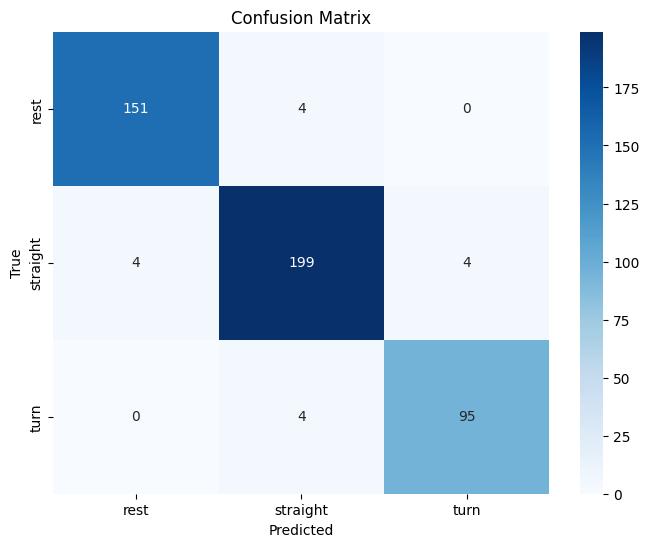

              precision    recall  f1-score   support

        rest       0.97      0.97      0.97       155
    straight       0.96      0.96      0.96       207
        turn       0.96      0.96      0.96        99

    accuracy                           0.97       461
   macro avg       0.97      0.97      0.97       461
weighted avg       0.97      0.97      0.97       461



In [97]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model seems to fit the data well, as evidenced by the suitable data size and the high Accuracy, Precision, Recall, and F1-score values across all labels.
2.  The intervals chosen for the C and gamma hyperparameters are appropriate, as they cover a wide range across multiple orders of magnitude and include values both smaller and larger than 1, enabling the exploration of various trade-offs.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [98]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [99]:
# prompt: Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# (1 marks)
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


In [100]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [101]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
# Predict the accuracy of the model on test_set1
accuracy1 = grid.score(X1, y1)
print(f"Test set 1 accuracy: {accuracy1:.2f}")

# Predict the accuracy of the model on test_set2
accuracy2 = grid.score(X2, y2)
print(f"Test set 2 accuracy: {accuracy2:.2f}")

Test set 1 accuracy: 0.94
Test set 2 accuracy: 0.75


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

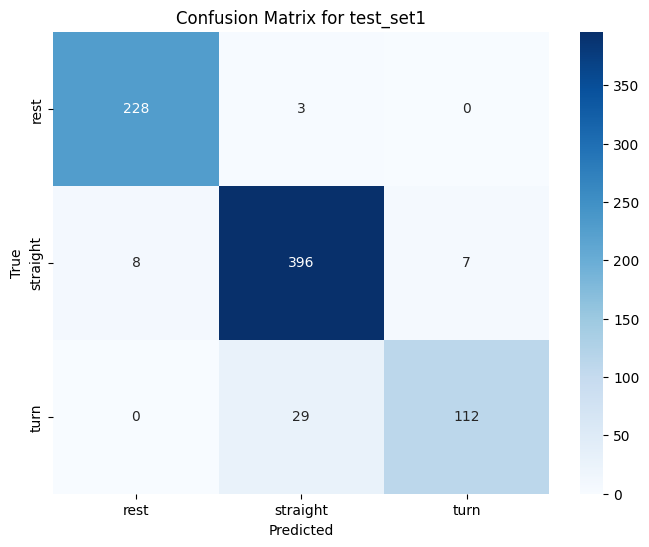

              precision    recall  f1-score   support

        rest       0.97      0.99      0.98       231
    straight       0.93      0.96      0.94       411
        turn       0.94      0.79      0.86       141

    accuracy                           0.94       783
   macro avg       0.94      0.91      0.93       783
weighted avg       0.94      0.94      0.94       783



In [102]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
# Predict on the test set using the best model
y1_pred = best_model.predict(X1)

# Create the confusion matrix
cm = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

# Print the classification report
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

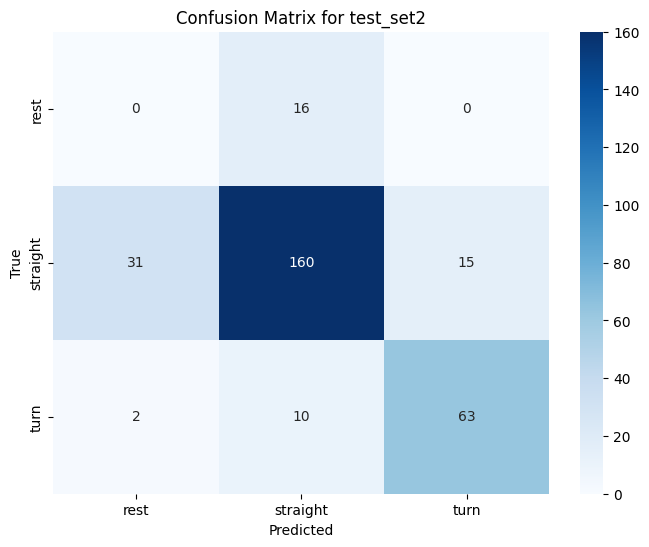

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.86      0.78      0.82       206
        turn       0.81      0.84      0.82        75

    accuracy                           0.75       297
   macro avg       0.56      0.54      0.55       297
weighted avg       0.80      0.75      0.77       297



In [103]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict on the test set using the best model
y2_pred = best_model.predict(X2)

# Create the confusion matrix
cm = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

# Print the classification report
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.The model performed exceptionally well on the (X_test, y_test) and (X1, y1) datasets, achieving Accuracy, Precision, Recall, and F1 scores above 0.90 for each class feature. However, it performed poorly on the (X2, y2) dataset, managing to classify only a single class (turn) and achieving a low accuracy score of 0.25. This discrepancy could be attributed to domain shift or dataset shift, where the distribution of input features differs substantially between the training and test datasets. As a result, the model likely struggled to recognize new patterns or characteristics in (X2, y2) that were underrepresented in the training data.
2. Potetial causes include:
i)Data Distribution Discrepancy: The features or patterns in (X2, y2) may differ significantly from those in the training dataset (X_train), hindering the model's ability to generalize effectively to this dataset.
ii)Feature Representation Challenges: Inconsistencies in feature processing or scaling across datasets could be present. Differences in sensor calibration or variations in data collection methods might lead to shifts in feature distributions.
iii)Dataset Bias: The training data may lack sufficient variability, limiting the model's ability to generalize to the third dataset. This could result in overfitting to specific features found in the first two datasets but missing in the third.
iv)Contextual Changes: In a sensor-based system, variations in environmental conditions or sensor placement could alter feature distributions. The third dataset may involve testing conditions or scenarios that differ substantially from those in the training data.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [104]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [105]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [106]:
# TODO - Perform model training and tuning using `GridSearchCV`
 # Define the pipeline
pipe_selected = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define the parameter grid for tuning
param_grid_selected = {
    'scaler': [StandardScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Initialize GridSearchCV
grid_selected = GridSearchCV(pipe_selected, param_grid_selected, cv=5, scoring='accuracy', return_train_score=True)

# Perform the grid search
grid_selected.fit(X, y)

# Display the best parameters and cross-validation accuracy
print("Best parameters:", grid_selected.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_selected.best_score_))


Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.81


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [107]:
# TODO: Print the results from the grid search
X_test_selected = X_test[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
print("Best params:\n{}\n".format(grid_selected.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid_selected.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid_selected.best_score_))
print("Test-set score: {:.2f}".format(grid_selected.score(X_test_selected, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.93
Best cross-validation validation score: 0.81
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

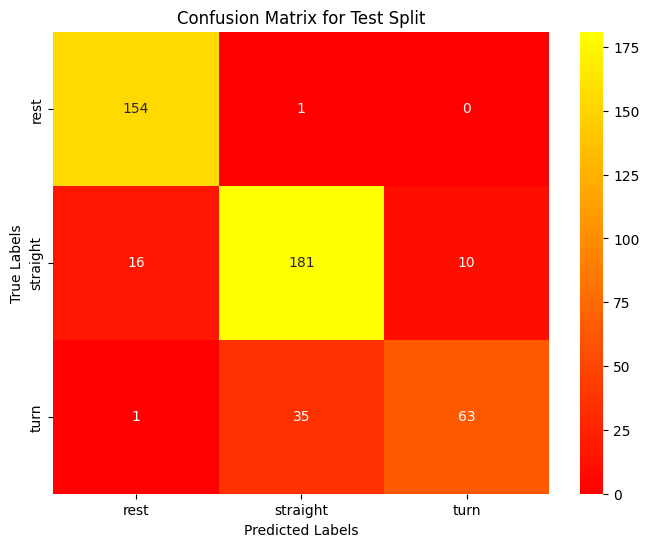

Classification Report for Test Split:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       155
    straight       0.83      0.87      0.85       207
        turn       0.86      0.64      0.73        99

    accuracy                           0.86       461
   macro avg       0.87      0.83      0.84       461
weighted avg       0.86      0.86      0.86       461



In [108]:
# TODO - Display confusion matrix and print classification reports
y_test_pred = grid_selected.predict(X_test_selected)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='autumn', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Split")
plt.show()
print("Classification Report for Test Split:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.The first model in Section 1 (1.2.3) demonstrates a better fit. While its perfect training score suggests potential overfitting, it outperforms others in validation and test results and offers more balanced metrics across classes. Its higher test accuracy, stronger validation performance, and more consistent class-wise results make it the preferred choice overall.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [109]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [110]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [111]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid_selected.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid_selected.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

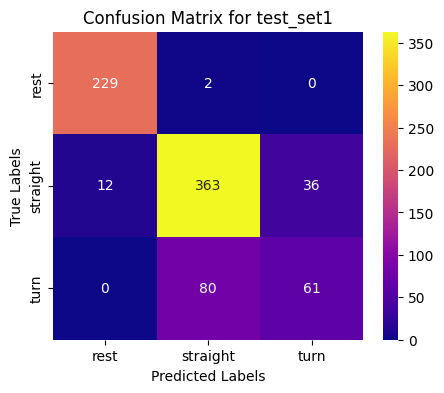

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       231
    straight       0.82      0.88      0.85       411
        turn       0.63      0.43      0.51       141

    accuracy                           0.83       783
   macro avg       0.80      0.77      0.78       783
weighted avg       0.82      0.83      0.82       783



In [112]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid_selected.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='plasma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

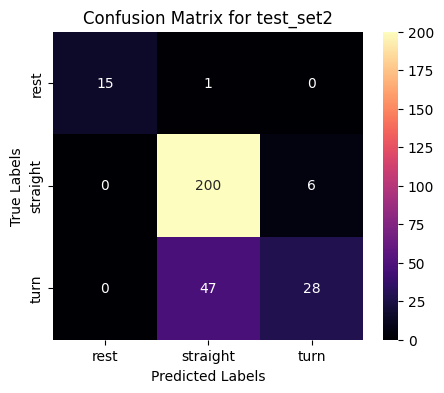

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.81      0.97      0.88       206
        turn       0.82      0.37      0.51        75

    accuracy                           0.82       297
   macro avg       0.88      0.76      0.79       297
weighted avg       0.82      0.82      0.79       297



In [113]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid_selected.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='magma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.Analyzing the results from the datasets in sections 2.1 and 2.2 reveals similar test set performance, with the dataset in 2.1 achieving a score of 0.83 and those in 2.2 scoring 0.82. While the overall accuracy remains comparable at 0.82–0.83, the class-wise performance shows notable differences. The "Rest" class consistently performed well across all three datasets, achieving precision and recall above 0.90. The "Straight" class was relatively stable, with precision ranging from 0.80 to 0.82. However, the "Turn" class exhibited the most variability and challenges, particularly in the final dataset (test_set2).

The consistent accuracy across test sets suggests stable but imperfect generalization. However, the variability in class-wise performance highlights potential issues, such as overfitting to majority classes, difficulty handling class imbalance, and sensitivity to distribution shifts between datasets.

2.In Section 1, the model performed best with the first dataset, achieving high validation and test scores and demonstrating excellent, balanced performance across all classes. The second dataset showed good generalization, with a slight performance drop but maintained balanced class performance. However, the third dataset experienced severe performance degradation, failing completely on the "Rest" and "Straight" classes (0.00 precision/recall) and predicting only the "Turn" class (0.25 precision, 1.00 recall). This indicates a significant dataset shift affecting the model with the third dataset.

In Section 2, all three datasets achieved similarly high accuracy overall, but their class-wise performance varied while remaining consistent within each dataset. The "Rest" and "Straight" classes generally performed well, while the "Turn" class showed variability and lower recall values, indicating slight evidence of distribution shifts.

In conclusion, the model in Section 2 outperformed the one in Section 1 due to its more stable performance across datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [114]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,2.365611e-09,6.964705e-10,0.024992,0.023871,0.022554
1,2.242613e-09,6.533136e-10,0.024828,0.024153,0.021731


In [115]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [116]:
# TODO - Perform model training and tuning using `GridSearchCV`
 # Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define pipeline and SVC model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', SVC())          # SVC classifier
])

# Define parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [117]:
# TODO - Perform model training and tuning using `GridSearchCV`
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [118]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.93
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

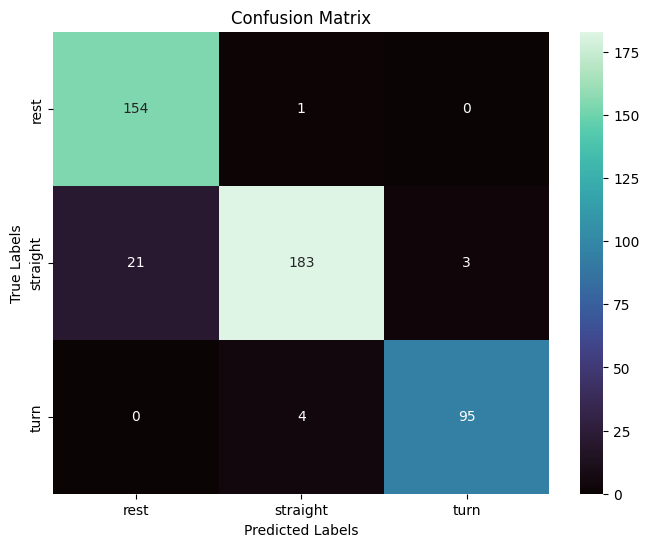

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.97      0.88      0.93       207
        turn       0.97      0.96      0.96        99

    accuracy                           0.94       461
   macro avg       0.94      0.95      0.94       461
weighted avg       0.94      0.94      0.94       461



In [119]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [120]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X1.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,3.655217e-09,6.507877e-10,0.024884,0.024056,0.025634
1,3.349120e-09,6.788807e-10,0.024881,0.024084,0.025218


In [121]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X2.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,1.718706e-09,1.211633e-09,0.049701,0.048406,0.012437
1,2.179497e-09,1.893673e-09,0.050477,0.047696,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [122]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.27


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

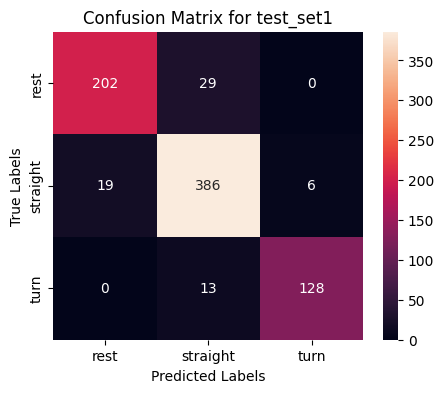

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.91      0.87      0.89       231
    straight       0.90      0.94      0.92       411
        turn       0.96      0.91      0.93       141

    accuracy                           0.91       783
   macro avg       0.92      0.91      0.91       783
weighted avg       0.92      0.91      0.91       783



In [123]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='rocket', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()

print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

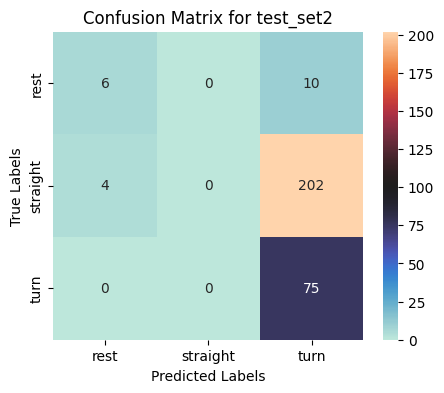

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.60      0.38      0.46        16
    straight       0.00      0.00      0.00       206
        turn       0.26      1.00      0.41        75

    accuracy                           0.27       297
   macro avg       0.29      0.46      0.29       297
weighted avg       0.10      0.27      0.13       297



In [124]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='icefire', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.a) Comparison with the Model in Section 1 (All Features): The models from Sections 1 and 3 demonstrated similar performance, achieving cross-validation accuracy of 95% and test accuracy of 96%. Both models performed well on test_set1, with accuracy exceeding 90%, but exhibited poor accuracy on test_set2, scoring only 25% and 30%, respectively. This indicates challenges in generalizing to test_set2, particularly for the "straight" class, where both models struggled equally.
b)Comparison with the Model in Section 2 (Predefined Selected Features): The model in Section 2 achieved a cross-validation accuracy of 82%, compared to 95% in Section 3. For the test datasets, the Section 2 model consistently achieved 82% accuracy on both test_set1 and test_set2, whereas the Section 3 model performed better on test_set1 (94%) but poorly on test_set2 (30%). This indicates that the predefined selected features in Section 2 resulted in a more balanced model across all datasets, while the Section 3 model may have overfitted, particularly struggling with the variability in test_set2. Additionally, the Section 3 model had difficulty with the "straight" class in test_set2, whereas the Section 2 model struggled more with the "turn" class in the same dataset.

2.The differences in performance can be attributed to factors such as the quality of feature selection, the information content of the features, and variability within the dataset. The model using group-selected features demonstrates that a well-chosen subset of features can capture motion state information nearly as effectively as using all available features. In Section 3, the selected features include variance and magnitude metrics from both accelerometer and gyroscope data, which likely provide more detailed insights into motion states compared to the more limited feature set in Section 2. However, the consistently poor performance on test_set2 across all models suggests challenges with generalization, likely due to fundamental differences or noise in the test set relative to the training data. This underscores the importance of effective feature selection, robust model design, and ensuring the training data sufficiently represents diverse real-world conditions.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [125]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [126]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [127]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [128]:
# Perform any missing imports
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [129]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [130]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [131]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

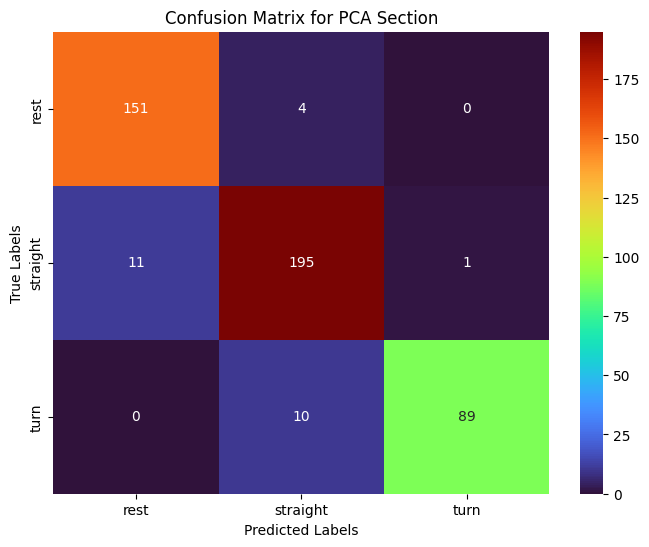

Classification Report for PCA Section:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [132]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for PCA Section")
plt.show()

print("Classification Report for PCA Section:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [133]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [134]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [135]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.40


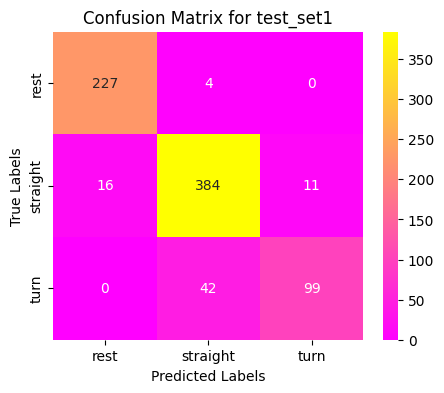

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [136]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='spring', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

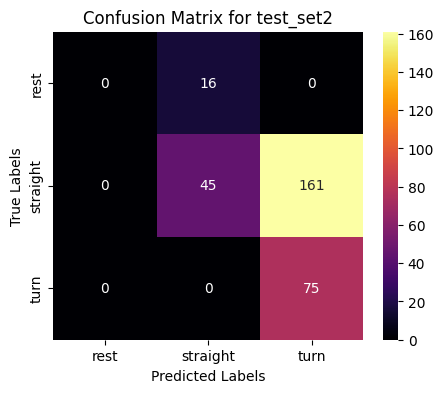

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



In [137]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. a)PCA Model (Section 4): The PCA-based model achieved a cross-validation accuracy of 94%, highlighting that not all original features are equally important for the classification task. The results suggest that PCA effectively captures the most critical variance in the data, retaining discriminative information while potentially reducing noise. The model also performed well on the test_set1 dataset, achieving high accuracy. However, its performance on test_set2 dropped significantly to 40%, indicating broader issues with generalization. The model particularly struggled with the "straight" class in test_set2.
   b)Comparison to Section 1 Model (All Features): Both the Section 1 model and the PCA model achieved high cross-validation and test accuracy, exceeding 90%. Similarly, both performed well on test_set1, with accuracy above 90%. However, their performance on test_set2 was much lower, with the Section 1 model scoring 25% and the PCA model 40%. While the PCA model had slightly lower accuracy on the first two datasets, it outperformed the Section 1 model on test_set2. Despite this, both models struggled with the "straight" class in test_set2.
   c)Comparison to Section 2 Model (Predefined Selected Features): The Section 4 PCA model outperformed the Section 2 model in overall accuracy (94% vs. 82%) and on test_set1 (91% vs. 82%). However, the Section 2 model excelled on test_set2, achieving 82% accuracy compared to the PCA model’s 40%. This suggests that the Section 2 model provided a more balanced performance, while the PCA model may have been affected by overfitting or data shifts. The Section 2 model demonstrated better adaptability to the test_set2 data. In terms of class-specific performance, the PCA model struggled more with the "straight" class, while the Section 2 model faced greater difficulty with the "turn" class in test_set2.
   d)Comparison to Section 3 Model (Group Selected Features): Both the Section 3 and PCA models achieved high cross-validation and test accuracy, exceeding 90%, as well as strong performance on test_set1 with accuracy above 90%. However, their accuracy on test_set2 was notably lower, with the Section 3 model scoring 30% and the PCA model 40%. While the PCA model had slightly lower accuracy on the first two datasets, it outperformed the Section 3 model on test_set2. Despite this, both models faced challenges with the "straight" class in test_set2.
2. a)Dimensionality Reduction with PCA: The Section 1 model utilized all available features, enabling it to capture complex relationships by using the full range of information. In contrast, Section 4 applied PCA to reduce the feature set to lower-dimensional components, simplifying the model but potentially omitting important features. This trade-off resulted in a slight decrease in performance on the test datasets.

   b)Feature Retention vs. Generalization: PCA aims to maximize the variance in the data, but it doesn't always prioritize features that are most strongly correlated with the target variable. Although this enhances computational efficiency, it can negatively impact generalization, as demonstrated by the PCA model's 35% accuracy on test_set2, in contrast to the 88% accuracy achieved by the Section 1 model.
   
   c)This performance indicates that the data collection process may have introduced significant variations between datasets, emphasizing the need for effective feature engineering and revealing the potential limitations of linear dimensionality reduction techniques in capturing complex variations in motion states.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [138]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,2.365611e-09,6.964705e-10,0.024992,0.023871,0.022554
1,2.242613e-09,6.533136e-10,0.024828,0.024153,0.021731


In [139]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [140]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [141]:
# Perform any missing imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [142]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [143]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [144]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.93
Test-set score: 0.93


Display the confusion matrix and print the classification report for the trained model using the *test* split.

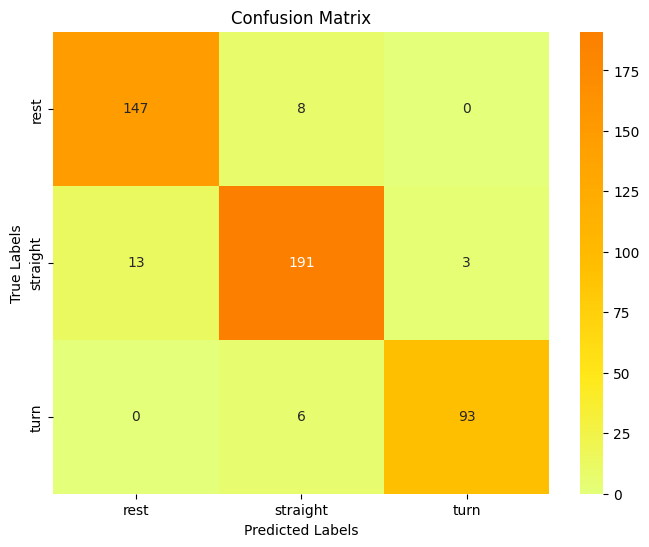

Classification Report:
              precision    recall  f1-score   support

        rest       0.92      0.95      0.93       155
    straight       0.93      0.92      0.93       207
        turn       0.97      0.94      0.95        99

    accuracy                           0.93       461
   macro avg       0.94      0.94      0.94       461
weighted avg       0.94      0.93      0.93       461



In [145]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Wistia', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [146]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X1.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,3.655217e-09,6.507877e-10,0.024884,0.024056,0.025634
1,3.349120e-09,6.788807e-10,0.024881,0.024084,0.025218


In [147]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X2.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,1.718706e-09,1.211633e-09,0.049701,0.048406,0.012437
1,2.179497e-09,1.893673e-09,0.050477,0.047696,0.013805


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [148]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.84
test_set2 score: 0.90


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

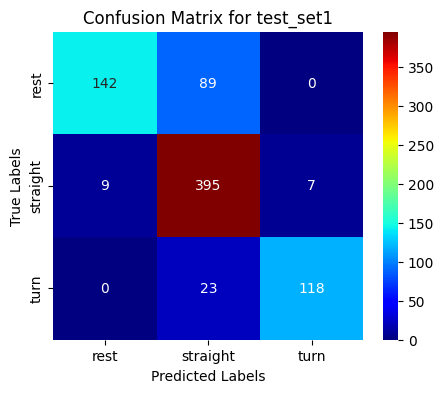

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.94      0.61      0.74       231
    straight       0.78      0.96      0.86       411
        turn       0.94      0.84      0.89       141

    accuracy                           0.84       783
   macro avg       0.89      0.80      0.83       783
weighted avg       0.86      0.84      0.83       783



In [149]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='jet', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

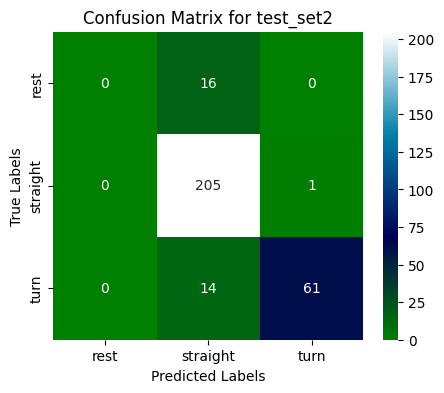

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.87      1.00      0.93       206
        turn       0.98      0.81      0.89        75

    accuracy                           0.90       297
   macro avg       0.62      0.60      0.61       297
weighted avg       0.85      0.90      0.87       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [150]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='ocean', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.When comparing the SVC and Random Forest models, the SVC outperforms the Random Forest model across several metrics. With an overall accuracy of 0.83 compared to 0.77 for Random Forest, the SVC offers more consistent and reliable classification. Both models face challenges with the "turn" class, likely due to class imbalance, but the SVC demonstrates better precision and recall for all classes. The SVC excels in creating clearer decision boundaries, particularly with the "rest" and "straight" classes. While the Random Forest model performs adequately, it struggles to capture the finer patterns in the data. Factors contributing to the SVC’s stronger performance include its alignment with the data's structure, more optimal hyperparameters, and better handling of class imbalance. As a result, the SVC model is recommended for this classification task, with potential improvements achievable through addressing class imbalance, fine-tuning hyperparameters, and further feature engineering.


____